<a href="https://colab.research.google.com/github/krjii/cs506_repo/blob/main/Module_3_state_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3

# Learning Objectives


*   To learn the fundamentals of Data Visualization
*   To learn about Matplotlib, Seaborn and Plotly
*   To learn how data visualization will help you to gain a better understanding on your data



**First Iphone Launch (2007)**

https://www.youtube.com/watch?v=MnrJzXM7a6o

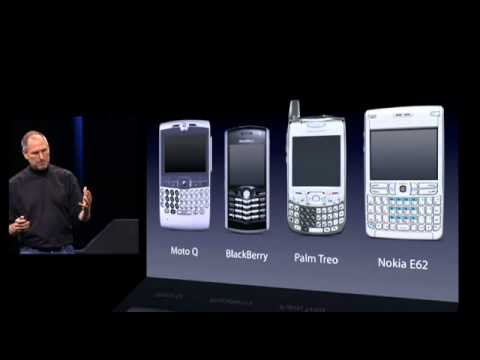

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="MnrJzXM7a6o", height=500, width=700,)

https://www.apple.com/newsroom/pdfs/fy2023-q4/FY23_Q4_Consolidated_Financial_Statements.pdf

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F5235af77-dcaf-4156-8dcc-ecd611c9ead4_2459x1378.png" width=900>

# Python Image Library

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
url="https://news.rice.edu/sites/g/files/bxs2656/files/inline-images/lovett-hall-sunset-540px.jpg"
os.system("wget -O rice.jpg {}".format(url))

0

<img src="https://e2eml.school/images/image_processing/three_d_array.png" width=400>

In [ ]:
pic1=Image.open("rice.jpg")
img=np.asarray(pic1)
img.shape

(360, 540, 3)

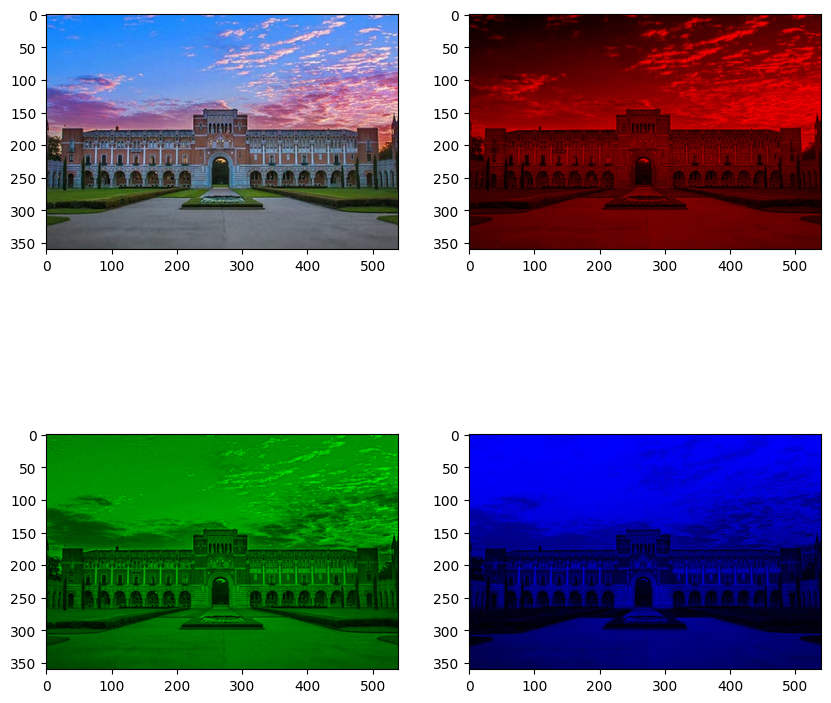

In [ ]:
red=img.copy()
red[:,:,1:]=0
green=img.copy()
green[:,:,0]=0
green[:,:,2]=0
blue=img.copy()
blue[:,:,:2]=0
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(img)
axs[0,1].imshow(red)
axs[1,0].imshow(green)
axs[1,1].imshow(blue)
plt.show()

In [79]:
url="/content/drive/MyDrive/AirPollutionDeathsGraphLN-superJumbo.webp"

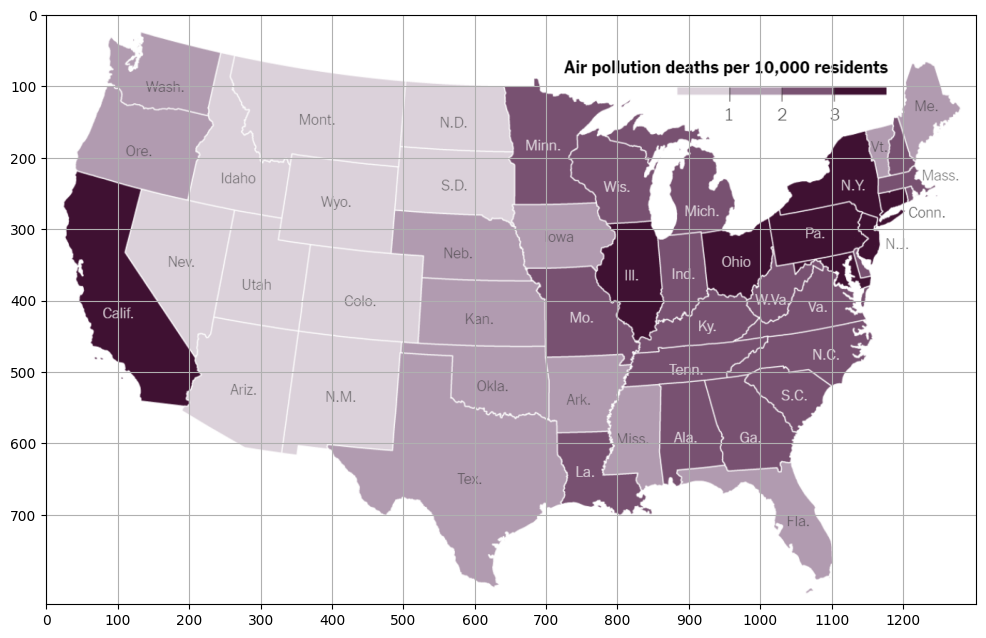

In [82]:
# Analizing the image
pic=Image.open("/content/drive/MyDrive/AirPollutionDeathsGraphLN-superJumbo.webp")
fig, axs = plt.subplots(figsize=(12,8))
axs.imshow(pic)
axs.grid()
#axs.axis("off")
axs.set_xticks(np.arange(0,1300,100))
axs.set_yticks(np.arange(0,800,100))
plt.show()

In [83]:
import plotly.graph_objects as go
import plotly.express as px


In [138]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/state_data.csv')

In [172]:
df['total deaths'] = df['total deaths']

# Create a custom colorscale
colorscale = [
    [0, 'rgb(240, 230, 255)'],   # Lightest violet
    [0.25, 'rgb(240, 230, 255)'],
    [0.25, 'rgb(190, 160, 255)'], # Light violet
    [0.5, 'rgb(190, 160, 255)'],
    [0.5, 'rgb(140, 90, 255)'],  # Medium violet
    [0.75, 'rgb(140, 90, 255)'],
    [0.75, 'rgb(90, 20, 255)'],  # Darkest violet
    [1, 'rgb(90, 20, 255)']
]

data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z=df['total deaths'].astype("string"), # Data to be color-coded
    locationmode='USA-states', # set of locations match entries in `locations`
    colorscale=colorscale,
    colorbar=dict(
        title=dict(
          text="Air pollution deaths per 10,000 residents",
          side="top",  # Place the title above the colorbar

          font=dict(size=14),
        ),
        orientation='h',
        ticks="outside",
        tickvals=[0.77, 1.51, 2.27, 3.75],  # Place ticks slightly left of the actual values
        ticktext=['1', '2', '3', '4'],
        len=0.2, # Shrink the colorbar
        x=0.80,  # Position it at the top right
        y=1.05,  # Move it slightly above the plot
        yanchor='top',
        xanchor='right',
    ),
    text=df['state'],
 )

fig = go.Figure(data)

# Add state labels using scattergeo
fig.add_scattergeo(
    locations=df['code'],
    locationmode='USA-states',
    text=df['code'],
    mode='text'
)

fig.update_layout(geo_scope='usa', # limited map scope to USA
                  dragmode=False,   # Disable drag
                  geo=dict(
                    showlakes=True,  # Show lakes
                    lakecolor='rgb(255, 255, 255)',
                    projection_scale=1,  # Adjust the scale of the map
                    center=dict(lat=37.0902, lon=-95.7129),  # Center the map to the USA
                    resolution=50,  # Increase resolution of map boundaries
                    showcoastlines=True,  # Show coastlines
                    coastlinecolor='rgb(255, 255, 255)',
                  ),
                  margin={"r":0,"t":75,"l":0,"b":10},
                )


fig.show()

# NYT activity

https://www.nytimes.com/2021/02/04/learning/whats-going-on-in-this-graph-us-air-pollution.html